# Visualizing 2025 Fire Scars in Los Angeles through False Color
## Lucian Scher
#### 11/22/25
#### [Github](https://github.com/lucianbluescher/eds220-hwk4/tree/main)

# About
## Purpose
This notebook explores the impacts of the 2025 Eaton and Palisades Fires using remote sensing data. After some data cleaning and exploration we create a false color image of the two fires with boundaries for the affected area in order to visualize the impact of these to wildfires on the surrounding area.


## Highlights
- Fire perimeter and landsat exploration using pandas
- Geospatial and array wrangling with geopandas, numpy and xarray
- True color and False color mapping with matplotlib

## Data

We used three datasets for this analysis. The first is a simplified set of spectral bands—red, green, blue, near-infrared, and shortwave infrared—from the Landsat 8 Collection 2 Level-2 surface reflectance product. These atmospherically corrected data were retrieved from the Microsoft Planetary Computer, then clipped to the region surrounding the Eaton and Palisades fire perimeters before being accessed 11/22/25 through a class Google Drive.

The second and third datasets are wildfire perimeter shapefiles for the Eaton and Palisades fires. Accessed 12/22/25 through Los Angeles counties National Interagency Fire Center (NIFC) ArcGIS Online Organization and is provided by the Fire Integrated Real-time Intelligence System (FIRIS).

## References

Data:

[1] Palisades and Eaton Dissolved Fire Perimeters (2025). (2025). Arcgis.com. https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about

‌[2] Microsoft Planetary Computer. (2025). Microsoft.com. https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2

Background information and Landsat band combinations: 

[3] Why is that Forest Red and That Cloud Blue? (2014, March 4). Nasa.gov; NASA Earth Observatory. https://earthobservatory.nasa.gov/features/FalseColor

[4] What are the band designations for the Landsat satellites? (2025, July 11). USGS. https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites

[5] Common Landsat Band Combinations. (2021, November 12). USGS. https://www.usgs.gov/media/images/common-landsat-band-combinations

‌
‌



In [22]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
fp = os.path.join('data', 'Eaton_Perimeter_20250121', 'Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp)

fp = os.path.join('data', 'Palisades_Perimeter_20250121', 'Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp)

landsat = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc", engine="netcdf4")

# 2 & 3 Data exploration

In [3]:
# Fire perimeter data exploration
print(f"The CRS for the Eaton Perimeter is {eaton.crs}")
print(f"The CRS for the Palisades Perimeter is {palisades.crs}")
print(f"The Eaton Perimeter is projected: {eaton.crs.is_projected}")
print(f"The Palisades Perimeter is projected: {palisades.crs.is_projected}")
eaton.info()
palisades.info()

The CRS for the Eaton Perimeter is EPSG:3857
The CRS for the Palisades Perimeter is EPSG:3857
The Eaton Perimeter is projected: True
The Palisades Perimeter is projected: True
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 

In [4]:
# Landsat Exploration
print(landsat.coords) # View coordinates
print(landsat.var) # View Variables
print(landsat.dims) # View Dimensions

Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...
<bound method DatasetAggregations.var of <xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...>
FrozenMappingWarningOnValuesAccess({'y': 1418, 'x': 2742})


The CRS of the Eaton and Palisades perimeter already match, both are projected and contain the same column names and types.

The landsat data is an arrary with red, green, blue, short-wave infrared and near-infrared variables. The dimensions are (y: 1418, x: 2742) and the coordinates are given in a 64-bit float.

# 4. Restoring geospatial information

Use rio.crs to print what is the CRS of this dataset. Is this a geospatial object?
The landsat object is not a geospatial object, it is an array in which the geospatial information is stored in the spatial_ref variable. 

In [5]:
# Check landsat CRS
print(landsat.rio.crs)

None


In [ ]:
# Print the CRS of landsat
print(landsat.spatial_ref.crs_wkt)
landsat_crs = landsat.spatial_ref.crs_wkt

#Recover the geospatial information by using rio.write_crs() 
landsat = landsat.rio.write_crs(landsat_crs)

#Print the CRS of the updated dataset.#
print(landsat.rio.crs)


PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
EPSG:32611


# 5. True Color Image

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


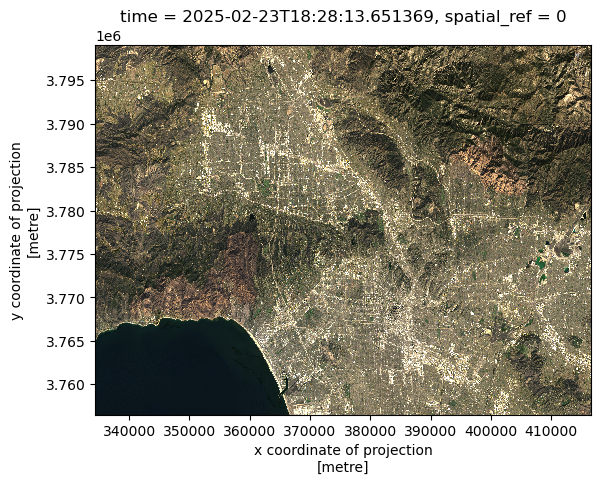

In [ ]:
# Select red, green and blue variables and plot as a numpy.array
landsat[["red", "green", "blue"]].to_array().plot.imshow(vmin = 7000, vmax = 15000)


red False
green True
blue True
nir08 False
swir22 False


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


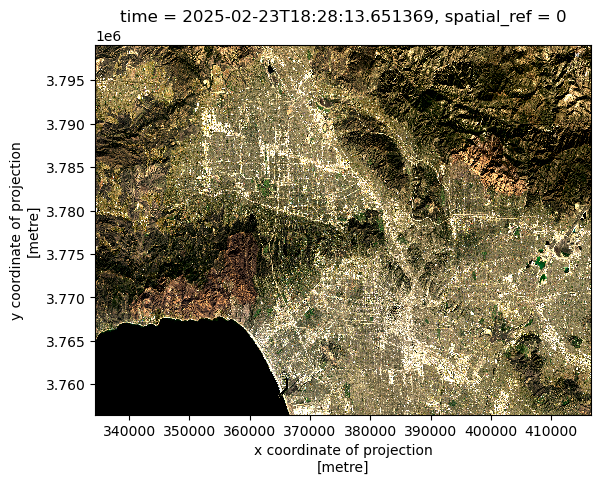

In [ ]:
# Adjust vmin and max and add robust parameter to get a true color image
landsat[["red", "green", "blue"]].to_array().plot.imshow(vmin = 8200, vmax = 13500, robust = True)


In [ ]:
# Check for nan values in each column
for band in landsat.data_vars:
    print(band, landsat[band].isnull().any().item())
    

OR

In [ ]:
# Identify which values are nan using
np.isnan(landsat)

<xarray.Dataset> Size: 19MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) bool 4MB False False False False ... False False False
    green        (y, x) bool 4MB False False False False ... False False False
    blue         (y, x) bool 4MB False False False False ... False False False
    nir08        (y, x) bool 4MB False False False False ... False False False
    swir22       (y, x) bool 4MB False False False False ... False False False

In [ ]:
# Substitute nan values with 0
landsat = landsat.fillna(0)

In [ ]:
# Check for nan values in each column to ensure it worked
for band in landsat.data_vars:
    print(band, landsat[band].isnull().any().item())


red False
green False
blue False
nir08 False
swir22 False


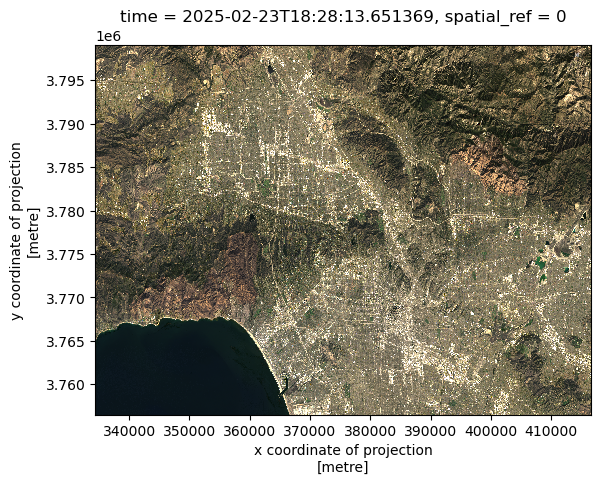

In [ ]:
# Plot new true color image with cleaned array
landsat[["red", "green", "blue"]].to_array().plot.imshow(vmin = 7000, vmax = 15000)

The new rendering with NAs set to 0 shows more clearly rhe burned areas of LAs wildfires. It is also closer to the true color because we adjusted the scales. 

# 6. False Color Image

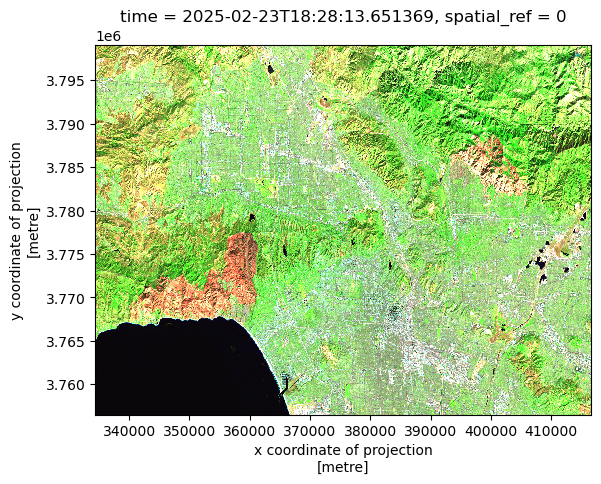

In [ ]:
# Plot false color image by plotting
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(vmin = 7000, vmax = 15000)

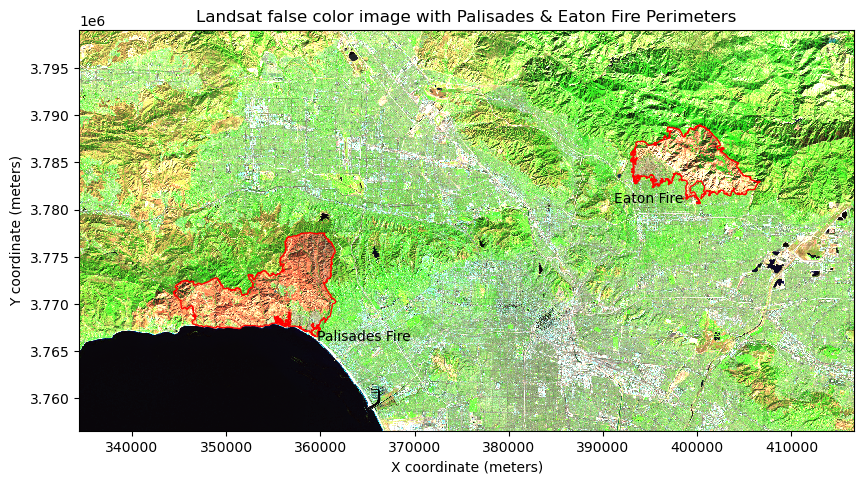

In [23]:

# Double check CRS of perimeter data
palisades = palisades.to_crs(landsat.rio.crs)
eaton = eaton.to_crs(landsat.rio.crs)

# Create the false color image from Landsat
fig, ax = plt.subplots(figsize=(10, 10))

landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(
    ax=ax,
    vmin=7000,
    vmax=15000
)

# Plot fire perimeter polygons on top of the  image
palisades.boundary.plot(ax=ax, color="red", linewidth=1)
eaton.boundary.plot(ax=ax, color="red", linewidth=1)

# Set center points of each perimeter
p_center = palisades.geometry.centroid.iloc[0]
e_center = eaton.geometry.centroid.iloc[0]

# Add labels for each fire
ax.text(p_center.x, p_center.y, "Palisades Fire",
        color="black", fontsize=10, 
        ha="left", va="center")

ax.text(e_center.x, e_center.y, "Eaton Fire",
        color="black", fontsize=10,
        ha="right", va="center")

# Add axis labels and title

ax.set_xlabel("X coordinate (meters)")
ax.set_ylabel("Y coordinate (meters)")
ax.set_title("Landsat false color image with Palisades & Eaton Fire Perimeters")

plt.show()


This image uses shortwave infrared (SWIR), near-infrared (NIR), and red bands to create a false color map that highlights burned areas and vegetation differences. In this band combination, healthy vegetation appears bright green due to strong SWIR reflectance, while recently burned or charred areas appear in red because NIR reflectance increases with moisture loss and burn severity.